<center><b>STEP : 1<b><center>

**<center> Exploratory Data Analysis (EDA) <center>**

EDA aligns with your methodology under 3.2.2.2 Data Preprocessing and 3.2.2.3 Model Development, where you emphasize data cleaning, feature engineering and understanding the dataset before modeling.

In [6]:
import pandas as pd
import os
from tabulate import tabulate
from pathlib import Path

# Define the datasets directory
DATASET_PATH = Path(r"C:\Users\Ricky\Desktop\For Fun Projects\SBT-Japan\datasets")


def analyze_csv_structure():
    # Get all CSV files
    csv_files = list(DATASET_PATH.glob("*.csv"))

    if not csv_files:
        print("No CSV files found in the datasets folder.")
        return

    # Store analysis results
    analysis = []
    all_columns = set()

    # Analyze each CSV file
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            columns = set(df.columns)
            all_columns.update(columns)

            analysis.append(
                {
                    "filename": file.name,
                    "rows": len(df),
                    "columns": sorted(columns),
                    "sample_data": (
                        df.head(1).to_dict("records")[0] if not df.empty else {}
                    ),
                }
            )

        except Exception as e:
            print(f"Error reading {file.name}: {e}")

    # Print analysis in formatted tables
    print("\n=== Dataset Structure Analysis ===\n")

    # Basic file information
    basic_info = [[d["filename"], d["rows"], len(d["columns"])] for d in analysis]
    print(
        tabulate(
            basic_info,
            headers=["Filename", "Total Rows", "Column Count"],
            tablefmt="grid",
        )
    )

    # Column comparison
    print("\n=== Column Comparison ===\n")
    comparison_data = []
    for file_info in analysis:
        missing = sorted(all_columns - set(file_info["columns"]))
        comparison_data.append(
            [
                file_info["filename"],
                "✓" if not missing else "✗",
                ", ".join(missing) if missing else "None",
            ]
        )

    print(
        tabulate(
            comparison_data,
            headers=["Filename", "Complete Columns?", "Missing Columns"],
            tablefmt="grid",
        )
    )

    # Print all unique columns
    print("\n=== All Unique Columns ===\n")
    print("\n".join(sorted(all_columns)))


if __name__ == "__main__":
    analyze_csv_structure()


=== Dataset Structure Analysis ===

+------------------------+--------------+----------------+
| Filename               |   Total Rows |   Column Count |
+========================+==============+================+
| autoboxmotors_cars.csv |          620 |             14 |
+------------------------+--------------+----------------+
| car_listings2.csv      |          106 |             12 |
+------------------------+--------------+----------------+
| Gig motors.csv         |          327 |             17 |
+------------------------+--------------+----------------+
| KAI$KARO.csv           |         2790 |             25 |
+------------------------+--------------+----------------+
| SBT-JAPAN.csv          |         9624 |             18 |
+------------------------+--------------+----------------+

=== Column Comparison ===

+------------------------+---------------------+------------------------------------------------------------------------------------------------------------------------

In [7]:
import pandas as pd
from pathlib import Path

# Set up paths
DATASET_PATH = Path(r"C:\Users\Ricky\Desktop\For Fun Projects\SBT-Japan\datasets")
OUTPUT_PATH = DATASET_PATH / "merged_data.csv"

# List all CSV files in the directory for debugging
print("Available CSV files in directory:")
available_files = [f.name for f in DATASET_PATH.glob("*.csv")]
for f in available_files:
    print(f"- {f}")
if not available_files:
    print("No CSV files found in the directory!")

# Define expected files and their sources (updated filenames)
files = {
    "autoboxmotors_cars.csv": "AutoBox Motors",
    "car_listings2.csv": "Car Listings",
    "Gig motors.csv": "Gig Motors",
    "KAI$KARO.csv": "Kai & Karo",
    "SBT-JAPAN.csv": "SBT-Japan"
}

# Column mapping dictionary (based on your key features and unique columns)
column_mapping = {
    "mileage": ["Mileage", "mileage"],
    "year_of_production": ["Year", "year", "year_of_manufacture"],
    "horse_power": ["horse_power"],
    "engine_size": ["engine_size", "Engine"],
    "seats": ["seats"],
    "price_ksh": ["Price (Ksh)", "price", "total_price", "fob_price"],
    "fuel_type": ["Fuel Type", "fuel", "fuel_type"],
    "transmission": ["Transmission", "transmission", "transmission_type"],
    "car_name": ["Car Link", "Title", "name"],
    "body_type": ["body_type", "vehicle_type"],
    "annual_insurance": ["annual_insurance"],
    "condition": ["condition", "Condition Grade"]
}

# Function to standardize column names
def standardize_columns(df, mapping):
    reverse_mapping = {v: k for k, vals in mapping.items() for v in vals}
    df.columns = [reverse_mapping.get(col, col) for col in df.columns]
    return df

# Load and merge datasets
all_dfs = []
for file, source in files.items():
    file_path = DATASET_PATH / file
    if file_path.exists():
        try:
            df = pd.read_csv(file_path)
            df = standardize_columns(df, column_mapping)
            df["source"] = source  # Add source column
            all_dfs.append(df)
            print(f"Successfully loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {e}")
    else:
        print(f"File not found: {file}")

if not all_dfs:
    raise FileNotFoundError("No valid CSV files were loaded. Please check the directory and filenames.")

# Concatenate all DataFrames
merged_df = pd.concat(all_dfs, ignore_index=True)

# Select only key features
key_features = list(column_mapping.keys()) + ["source"]
merged_df = merged_df[key_features]

# Save the merged dataset
merged_df.to_csv(OUTPUT_PATH, index=False)
print(f"Merged dataset saved to {OUTPUT_PATH}")
print("Columns in merged dataset:", merged_df.columns.tolist())
print("Shape of merged dataset:", merged_df.shape)

Available CSV files in directory:
- autoboxmotors_cars.csv
- car_listings2.csv
- Gig motors.csv
- KAI$KARO.csv
- SBT-JAPAN.csv
Successfully loaded: autoboxmotors_cars.csv
Successfully loaded: car_listings2.csv
Successfully loaded: Gig motors.csv
Successfully loaded: KAI$KARO.csv
Successfully loaded: SBT-JAPAN.csv


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [8]:
import pandas as pd
from pathlib import Path

# Set up paths
DATASET_PATH = Path(r"C:\Users\Ricky\Desktop\For Fun Projects\SBT-Japan\datasets")
OUTPUT_PATH = DATASET_PATH / "merged_data.csv"

# List all CSV files in the directory for debugging
print("Available CSV files in directory:")
available_files = [f.name for f in DATASET_PATH.glob("*.csv")]
for f in available_files:
    print(f"- {f}")
if not available_files:
    print("No CSV files found in the directory!")

# Define expected files and their sources
files = {
    "autoboxmotors_cars.csv": "AutoBox Motors",
    "car_listings2.csv": "Car Listings",
    "Gig motors.csv": "Gig Motors",
    "KAI$KARO.csv": "Kai & Karo",
    "SBT-JAPAN.csv": "SBT-Japan",
}

# Column mapping dictionary
column_mapping = {
    "mileage": ["Mileage", "mileage"],
    "year_of_production": ["Year", "year", "year_of_manufacture"],
    "horse_power": ["horse_power"],
    "engine_size": ["engine_size", "Engine"],
    "seats": ["seats"],
    "price_ksh": ["Price (Ksh)", "price", "total_price", "fob_price"],
    "fuel_type": ["Fuel Type", "fuel", "fuel_type"],
    "transmission": ["Transmission", "transmission", "transmission_type"],
    "car_name": ["Car Link", "Title", "name"],
    "body_type": ["body_type", "vehicle_type"],
    "annual_insurance": ["annual_insurance"],
    "condition": ["condition", "Condition Grade"],
}


# Function to standardize column names and handle duplicates
def standardize_columns(df, mapping):
    reverse_mapping = {v: k for k, vals in mapping.items() for v in vals}
    # Standardize column names
    new_columns = []
    seen = set()
    for col in df.columns:
        standardized_col = reverse_mapping.get(col, col)
        # If column is a duplicate, append a suffix
        if standardized_col in seen:
            counter = 1
            new_col = f"{standardized_col}_{counter}"
            while new_col in seen:
                counter += 1
                new_col = f"{standardized_col}_{counter}"
            new_columns.append(new_col)
            print(f"Duplicate column '{standardized_col}' renamed to '{new_col}'")
        else:
            new_columns.append(standardized_col)
        seen.add(new_columns[-1])
    df.columns = new_columns
    return df


# Load and merge datasets
all_dfs = []
for file, source in files.items():
    file_path = DATASET_PATH / file
    if file_path.exists():
        try:
            df = pd.read_csv(file_path)
            print(f"\nColumns in {file} before standardization:", df.columns.tolist())
            df = standardize_columns(df, column_mapping)
            print(f"Columns in {file} after standardization:", df.columns.tolist())
            df["source"] = source  # Add source column
            all_dfs.append(df)
            print(f"Successfully loaded: {file}")
        except Exception as e:
            print(f"Error loading {file}: {e}")
    else:
        print(f"File not found: {file}")

if not all_dfs:
    raise FileNotFoundError(
        "No valid CSV files were loaded. Please check the directory and filenames."
    )

# Concatenate all DataFrames
merged_df = pd.concat(all_dfs, ignore_index=True)

# Select only key features
key_features = list(column_mapping.keys()) + ["source"]
# Filter only columns that exist in merged_df
available_features = [col for col in key_features if col in merged_df.columns]
merged_df = merged_df[available_features]

# Save the merged dataset
merged_df.to_csv(OUTPUT_PATH, index=False)
print(f"\nMerged dataset saved to {OUTPUT_PATH}")
print("Columns in merged dataset:", merged_df.columns.tolist())
print("Shape of merged dataset:", merged_df.shape)

Available CSV files in directory:
- autoboxmotors_cars.csv
- car_listings2.csv
- Gig motors.csv
- KAI$KARO.csv
- SBT-JAPAN.csv

Columns in autoboxmotors_cars.csv before standardization: ['Title', 'Year', 'Fuel Type', 'Engine', 'Transmission', 'Exterior Color', 'Interior Color', 'Drive', 'Mileage', 'Condition Grade', 'Interior Grade', 'Availability', 'Chassis Number', 'Details Link']
Columns in autoboxmotors_cars.csv after standardization: ['car_name', 'year_of_production', 'fuel_type', 'engine_size', 'transmission', 'Exterior Color', 'Interior Color', 'Drive', 'mileage', 'condition', 'Interior Grade', 'Availability', 'Chassis Number', 'Details Link']
Successfully loaded: autoboxmotors_cars.csv

Columns in car_listings2.csv before standardization: ['Title', 'Make', 'Model', 'Year', 'Price (Ksh)', 'Fuel Type', 'Position', 'Usage', 'Status', 'Stock ID', 'Image URL', 'Car Link']
Duplicate column 'car_name' renamed to 'car_name_1'
Columns in car_listings2.csv after standardization: ['car_na

=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mileage             12916 non-null  object 
 1   year_of_production  11053 non-null  object 
 2   horse_power         2787 non-null   float64
 3   engine_size         13344 non-null  object 
 4   seats               8595 non-null   object 
 5   price_ksh           12518 non-null  object 
 6   fuel_type           13452 non-null  object 
 7   transmission        13346 non-null  object 
 8   car_name            3516 non-null   object 
 9   body_type           12739 non-null  object 
 10  annual_insurance    2790 non-null   float64
 11  condition           3708 non-null   object 
 12  source              13467 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB
None

=== Summary Statistics ===
       horse_power  annual_insurance
count  2

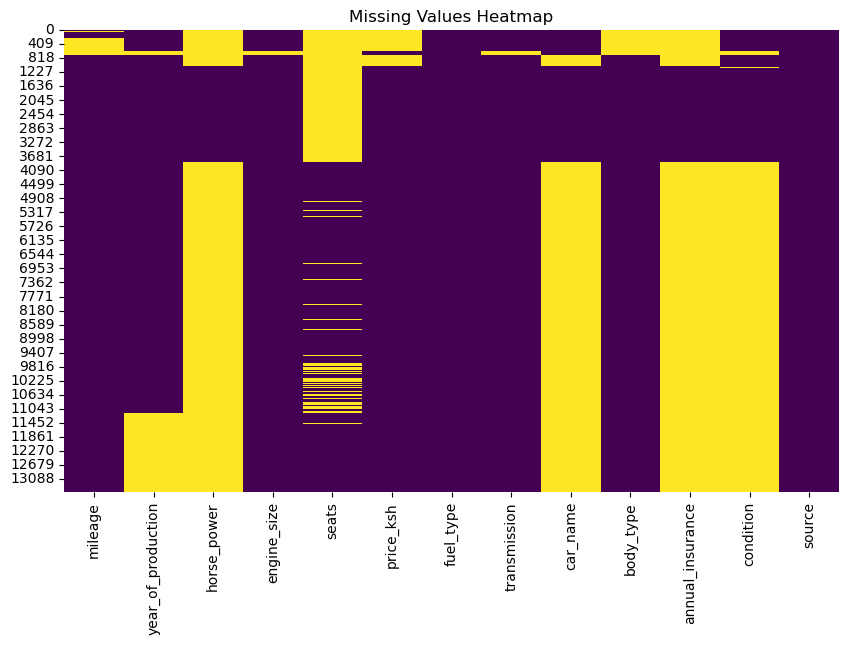

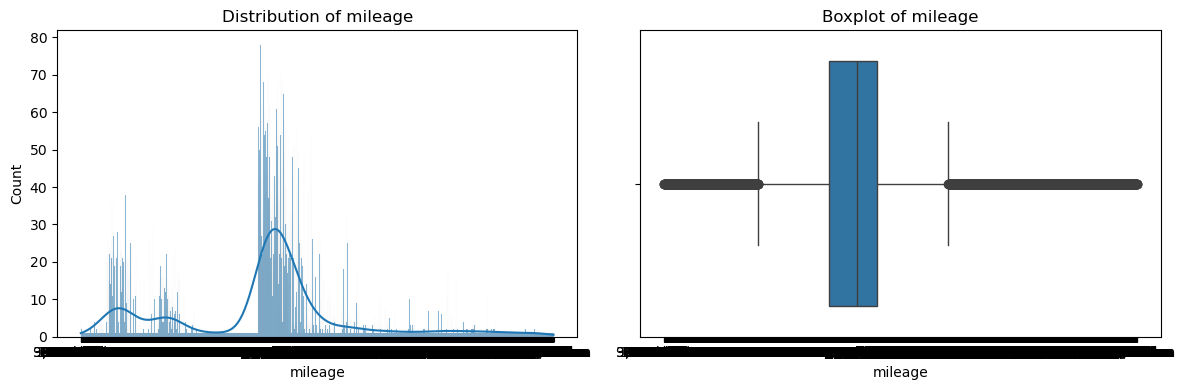

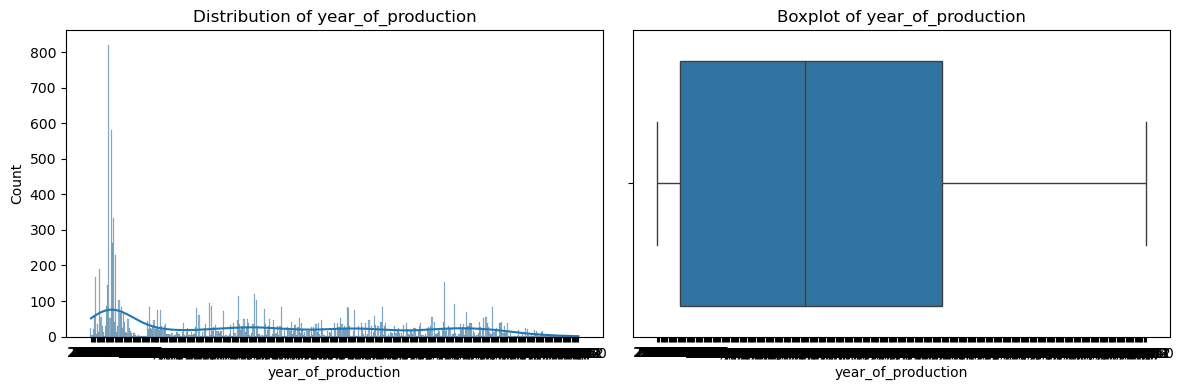

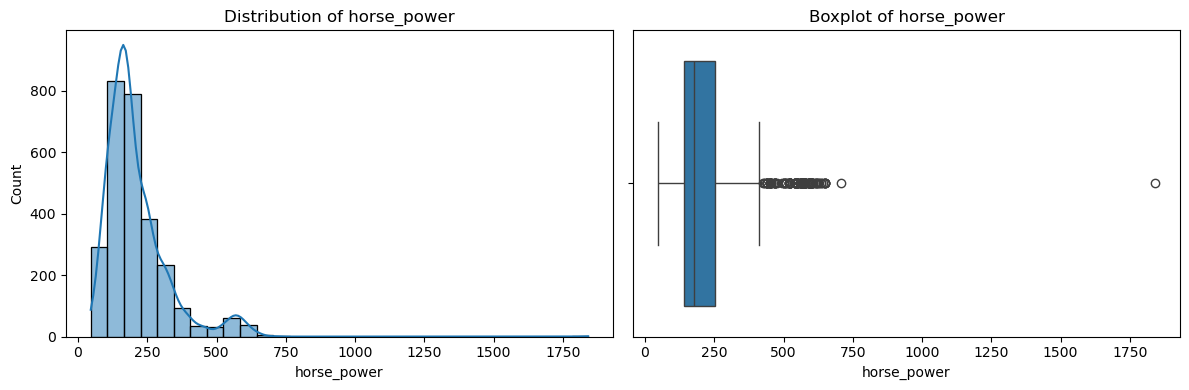

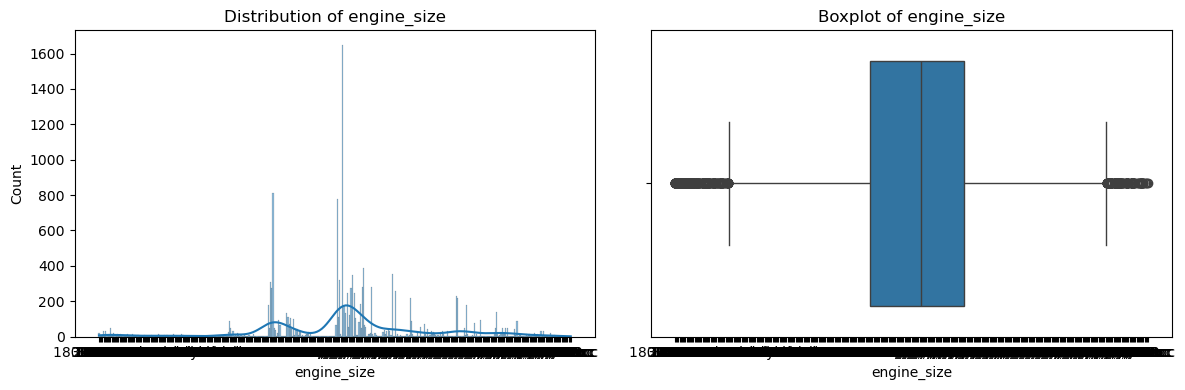

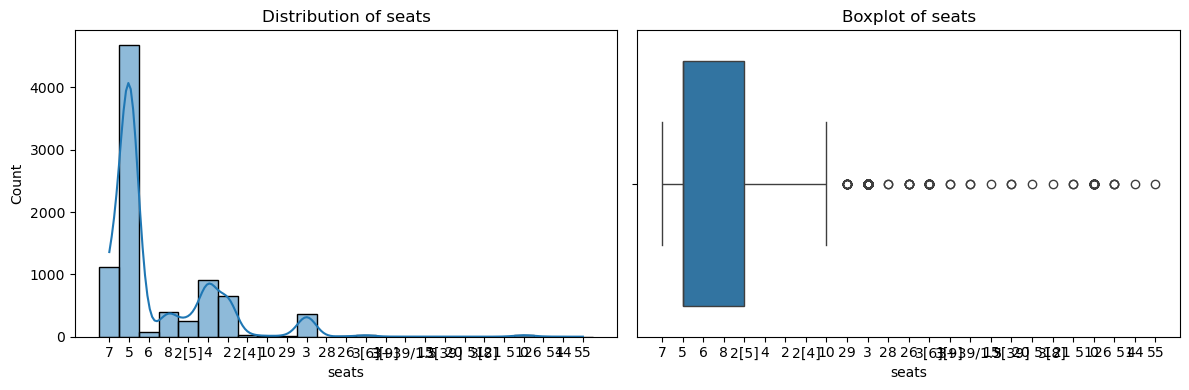

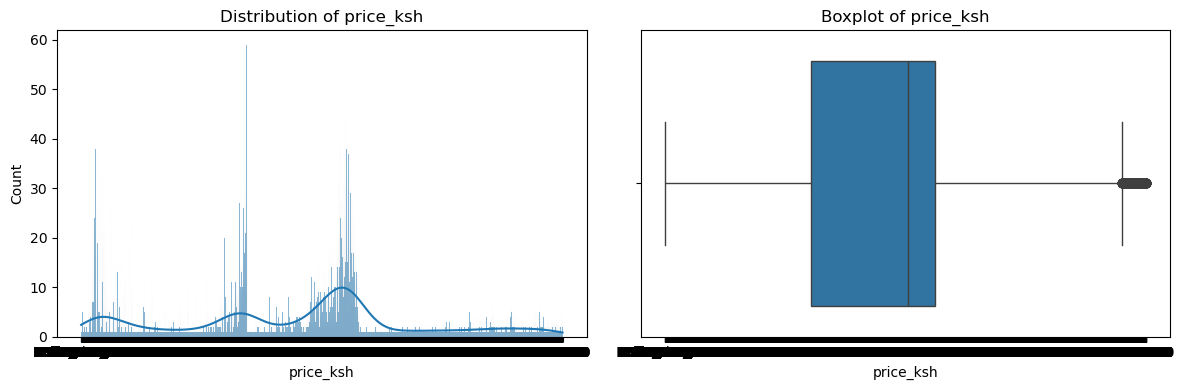

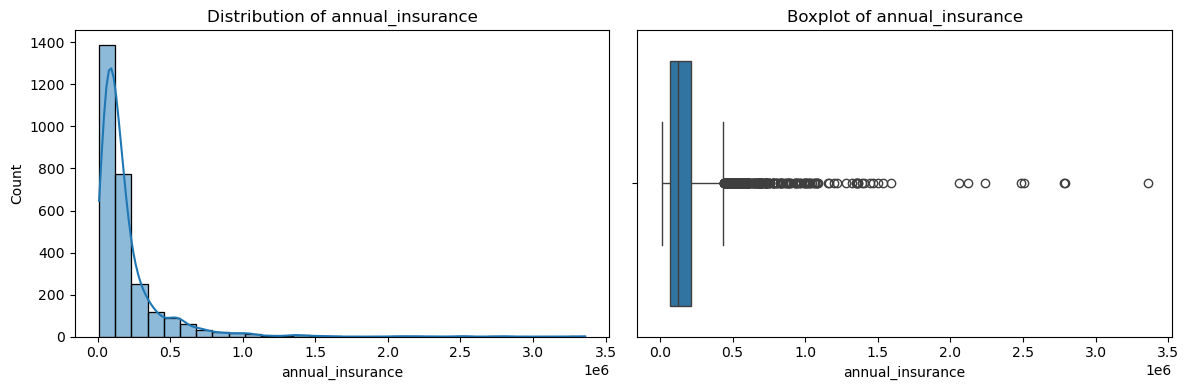

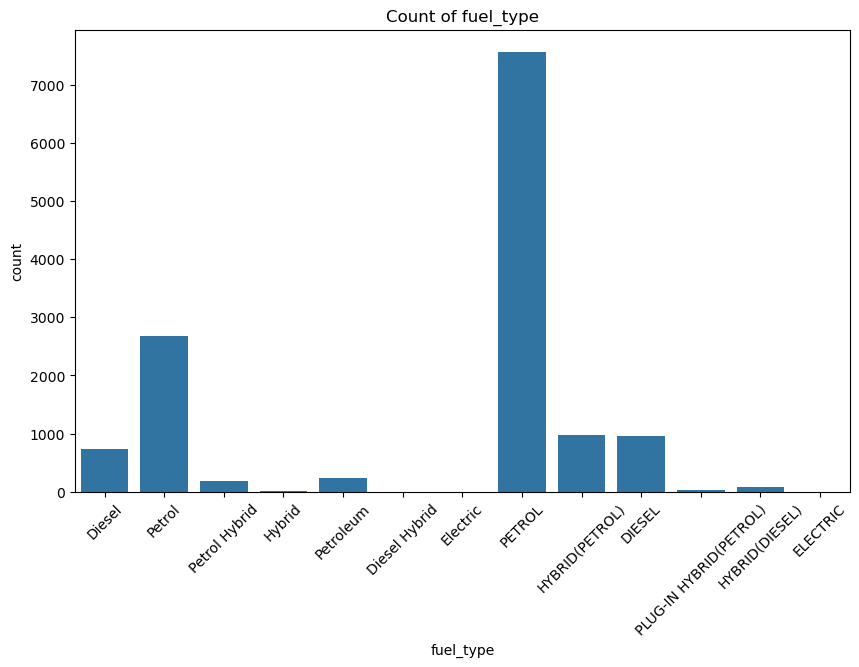

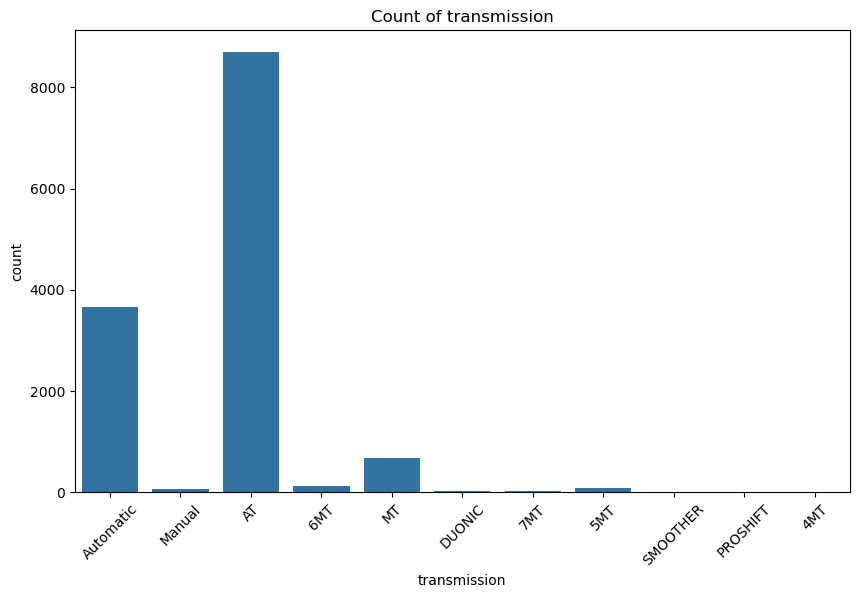

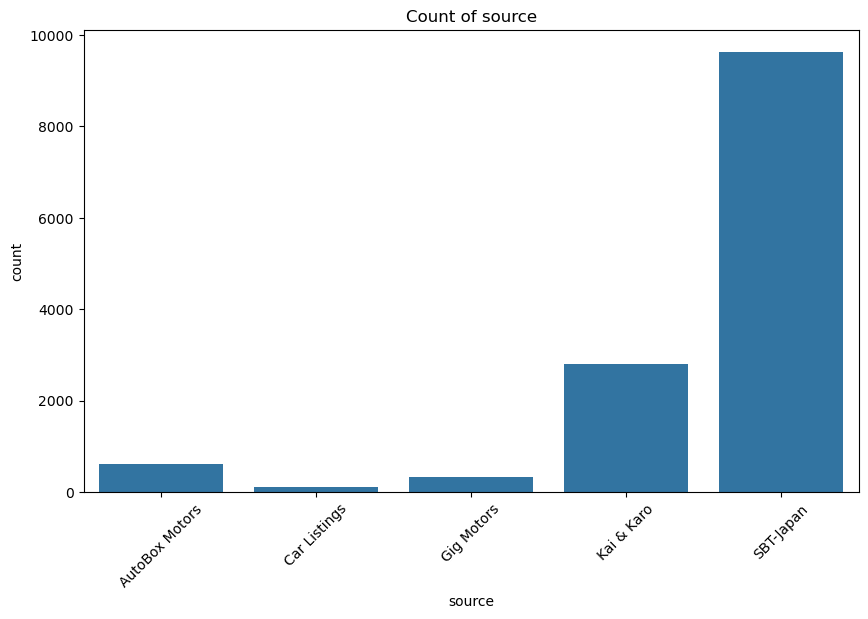

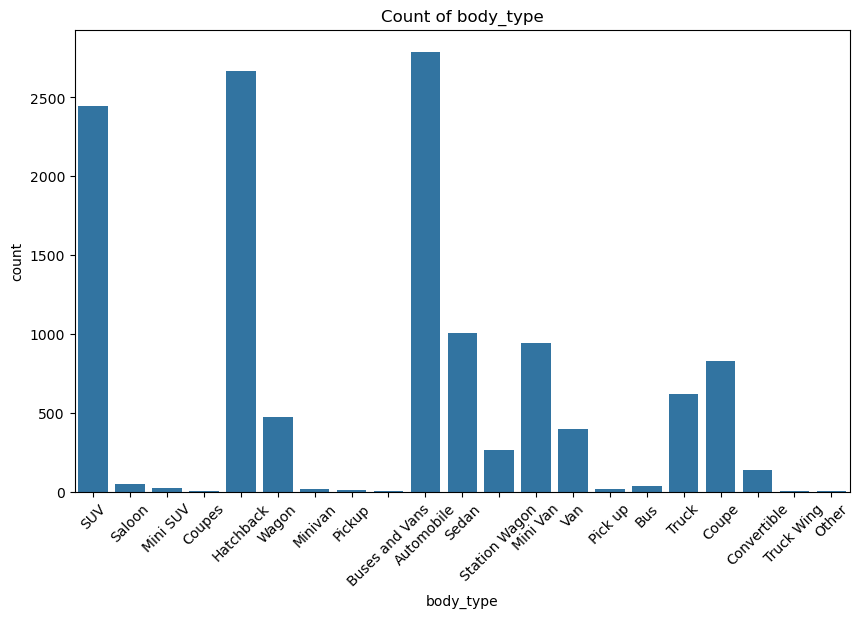

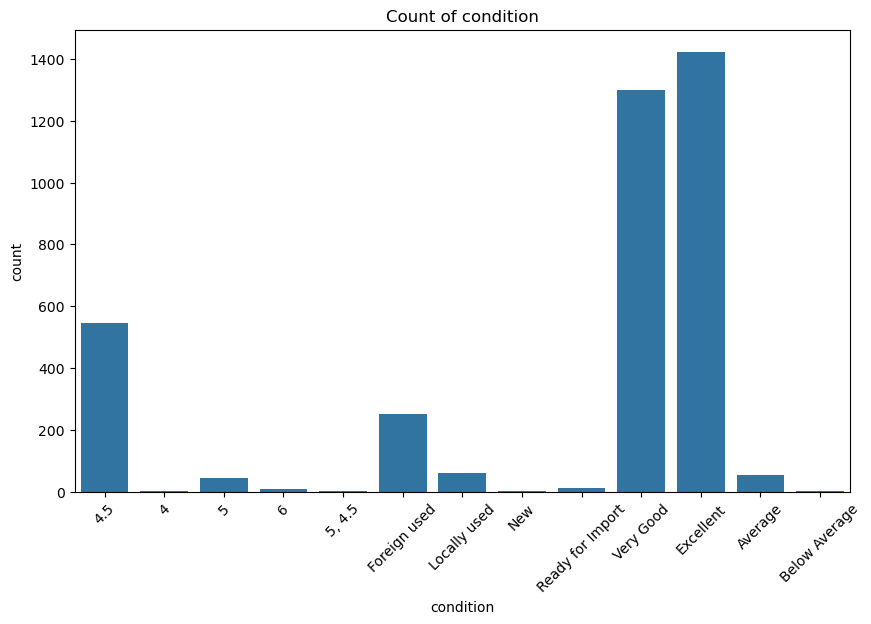

c:\Users\Ricky\anaconda3\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Ricky\anaconda3\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


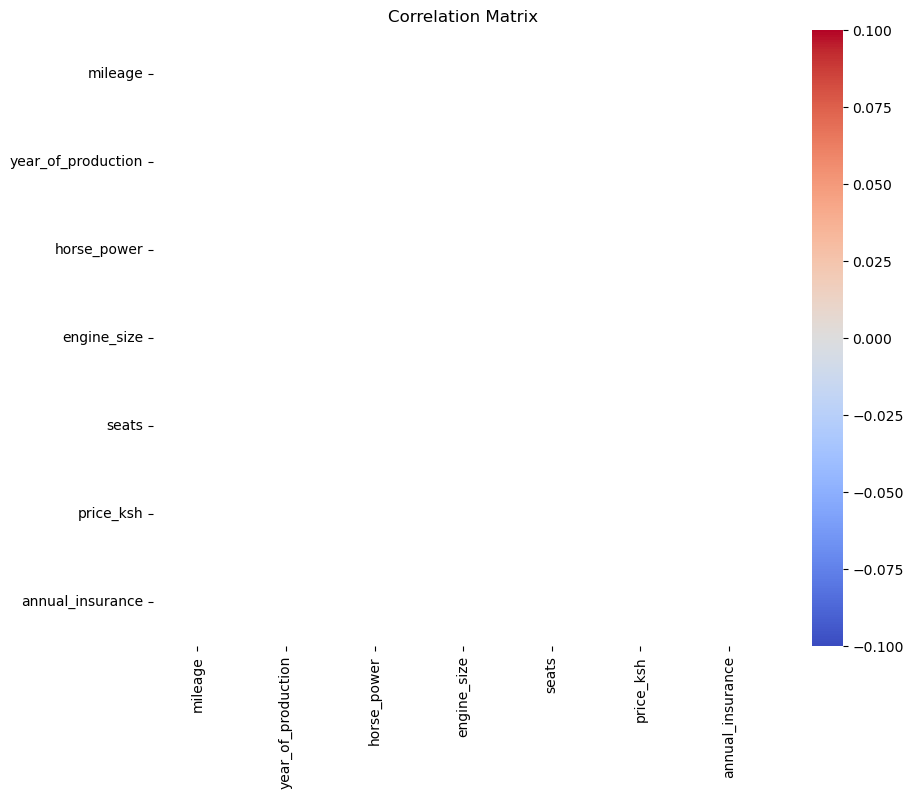

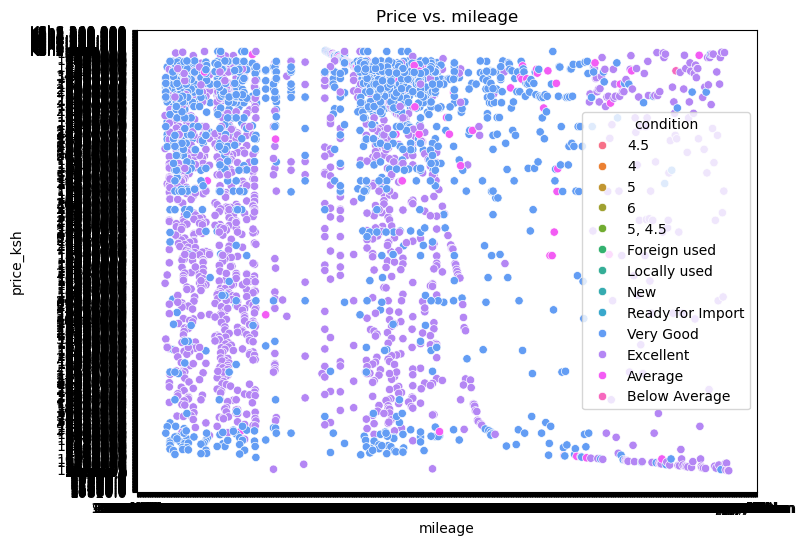

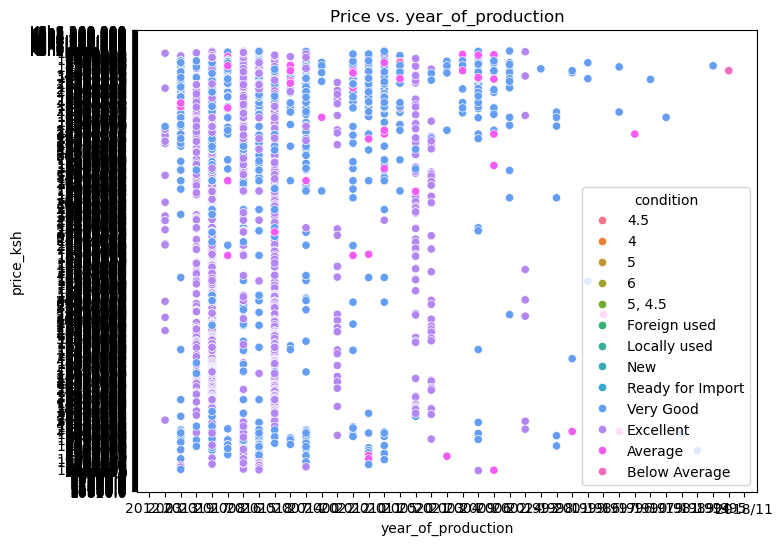

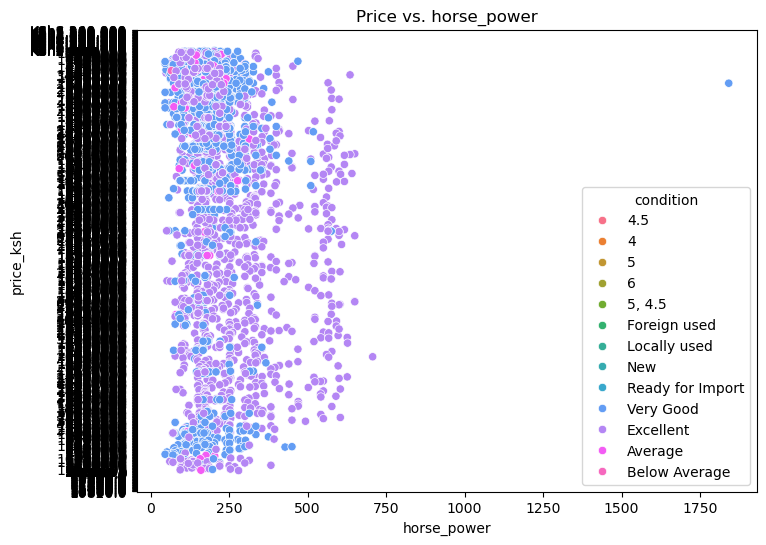

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up paths and load data
DATASET_PATH = Path(r"C:\Users\Ricky\Desktop\For Fun Projects\SBT-Japan\datasets")
df = pd.read_csv(DATASET_PATH / "merged_data.csv")

# Define key features from the merged dataset
key_features = [
    "mileage",
    "year_of_production",
    "horse_power",
    "engine_size",
    "seats",
    "price_ksh",
    "fuel_type",
    "transmission",
    "car_name",
    "body_type",
    "annual_insurance",
    "condition",
    "source",
]

# 1. Basic Overview
print("=== Dataset Overview ===")
print(df.info())
print("\n=== Summary Statistics ===")
print(df.describe())

# 2. Missing Values
print("\n=== Missing Values ===")
missing = df[key_features].isnull().sum()
print(missing)
plt.figure(figsize=(10, 6))
sns.heatmap(df[key_features].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 3. Numerical Feature Distribution and Outliers
numerical_cols = [
    "mileage",
    "year_of_production",
    "horse_power",
    "engine_size",
    "seats",
    "price_ksh",
    "annual_insurance",
]
for col in numerical_cols:
    if col in df.columns:
        plt.figure(figsize=(12, 4))
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")

# 4. Categorical Feature Analysis
categorical_cols = ["fuel_type", "transmission", "source", "body_type", "condition"]
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45)
        plt.title(f"Count of {col}")
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")

# 5. Feature Relationships
# Correlation Matrix
plt.figure(figsize=(10, 8))
numerical_df = df[numerical_cols].dropna()
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Price vs. Key Features
for col in ["mileage", "year_of_production", "horse_power"]:
    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=df,
            x=col,
            y="price_ksh",
            hue="condition" if "condition" in df.columns else None,
        )
        plt.title(f"Price vs. {col}")
        plt.show()

# 6. Feature Engineering
if "year_of_production" in df.columns:
    df["car_age"] = 2025 - df["year_of_production"]
    if "mileage" in df.columns:
        df["mileage_per_year"] = df["mileage"] / df["car_age"]
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x="mileage_per_year", y="price_ksh")
        plt.title("Price vs. Mileage per Year")
        plt.show()